We will build a simple CNN model to classify CIFAR images.CIFAR10 dataset consists of 60000 color images in 10 classes with 6000 image of each class. There are 50000 train images and 10000 test images.
Steps
- Import Keras
- Download and prepare CIFAR10 dataset
- Verify the data
- Create the CNN model
- Compile and train the model
- Evaluate the model

In [1]:
# import library
from keras import datasets , layers , models # to build CNN model
import matplotlib.pyplot as plt # for visualisation

In [2]:
# import dataset
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()
# Normalise pixel value to between 0 and 1
X_train, X_test = X_train/255 , X_test / 255

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Check the shape of image
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [4]:
# check shape of test
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


In [6]:
# check the label
y_train[0][0]

6

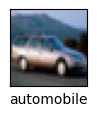

In [13]:
# to verify let us print few images
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_train[4])
plt.xlabel(class_names[y_train[4][0]])
plt.show()


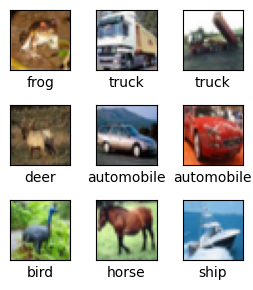

In [22]:
plt.figure(figsize=(3,3))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])  # to display the images
  plt.xlabel(class_names[y_train[i][0]])
  plt.tight_layout()
plt.show()

In [25]:
#help(plt.xticks)

In [27]:
# create the model
model = models.Sequential()
#input layer
model.add(layers.Conv2D(32 , (3,3), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
# first hidden layer
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
# second hidden layer
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
# output layer
model.add(layers.Dense(10 , activation='softmax'))



In [28]:
import tensorflow as tf

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
history = model.fit(X_train,y_train,epochs=2, validation_data=[X_test,y_test])

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 75s 47ms/step - loss: 1.5076 - accuracy: 0.4524 - val_loss: 1.2602 - val_accuracy: 0.5423
Epoch 2/2
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1585 - accuracy: 0.5914 - val_loss: 1.0736 - val_accuracy: 0.6247


In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0736 - accuracy: 0.6247


[1.0735530853271484, 0.6247000098228455]